# Data Incubator
---

---

In [6]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -u -n -t -z
%watermark -p numpy,pandas,matplotlib
%watermark

Vutsal Singhal
last updated: Sun Oct 29 2017 16:29:55 EDT
numpy 1.13.3
pandas 0.20.3
matplotlib 2.0.2
2017-10-29T16:29:55-04:00

CPython 3.5.2
IPython 6.2.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.10.0-37-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


---
# Q1.

**A knight in standard international chess is sitting on a board as follows**

      0   1   2   3 
      4   5   6   7 
      8   9  10  11 
     12  13  14  15 

**The knight starts on square "0" and makes T jumps to other squares according to the allowable moves in Chess (so that at each space, it has between two to four valid moves). The knight chooses amongst the allowable moves at each jump uniformly at random and keeps track of the running sum S of keys on which it lands. See below for specific questions and answers.**

In [1]:
from random import randint
import numpy as np

chess_board = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]]

In [2]:
def new_coordinates(x, y):

    while True:
        dx, dy = 1, 2
        r = randint(0, 7)
        if r % 2:
            dx, dy = dy, dx
        if (r >> 1) % 2:
            dx = -dx
        if (r >> 2) % 2:
            dy = -dy

        newx, newy = x + dx, y + dy
        if (newx >= 0 and newx < 4 and newy >= 0 and newy < 4):
            return (newx, newy)

def random_walk(t):
    x, y = x0, y0 = 0, 0
    count = 0
    t_sum = 0
    while True:
        x, y = new_coordinates(x, y)
        t_sum += chess_board[y][x]
        count += 1
        if count == t:
            return t_sum
        elif x == x0 and y == y0:
            return t_sum

t_sum = []
num_reps = 100000

**Q1.i) After T=16 moves, what is the mean of the quantity S modulo 13? What is the standard deviation?**

In [11]:
for i in range(num_reps):
    t_sum.append(random_walk(16))
print("Mean sum of T=16 modulo 13: ",(sum(t_sum)/float(num_reps))%13)
print("Std. Dev: ",np.std(t_sum, axis=0))

Mean sum of T=16 modulo 13:  8.764439999999993
Std. Dev:  52.3108066415


**Q1.ii) After T=16 moves, what is the probability that the sum is divisible by 5, given that it is divisible by 13?**

In [12]:
t_sum1 = [i for i in t_sum if i%65 == 0]
print("After T=16 moves, what's the probability that the sum is divisible by 13, given it's divisible by 5?: ",len(t_sum1)/len(t_sum))

After T=16 moves, what's the probability that the sum is divisible by 13, given it's divisible by 5?:  0.01614


**Q1.iii) Q1.i After T=512 moves, what is the mean of the quantity S modulo 311? What is the standard deviation?**

In [3]:
for i in range(num_reps):
    t_sum.append(random_walk(512))
print("Mean sum of T=512 modulo 311: ",(sum(t_sum)/float(num_reps))%311)
print("Std. Dev: ",np.std(t_sum, axis=0))

Mean sum of T=512 modulo 311:  179.78033
Std. Dev:  236.580462792


**Q1.iv) After T=512 moves, what is the probability that the sum is divisible by 7, given that it is divisible by 43?**

In [4]:
t_sum1 = [i for i in t_sum if i%310 == 0]
print("After T=512 moves, what's the probability that the sum is divisible by 7, given it's divisible by 43?: ",len(t_sum1)/float(len(t_sum)))

After T=512 moves, what's the probability that the sum is divisible by 7, given it's divisible by 43?:  0.00119


---

---
# Q2

The UK has a [dataset](https://data.gov.uk/dataset/road-accidents-safety-data) on vehicle accidents. Please dowload the "2014 All STATS19 data (accident, casualties and vehicle tables) for 2005 to 2014." Information on the variables can be found at the bottom of the page under additional links. In addition, the form which is used to record data by police officers can be found [here](http://docs.adrn.ac.uk/888043/mrdoc/pdf/888043_stats19-road-accident-injury-statistics-report-form.pdf).

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Import data

In [25]:
accident_file   = "Stats19_Data_2005_2014/Accidents0514.csv"
casualties_file = "Stats19_Data_2005_2014/Casualties0514.csv"
vehicles_file   = "Stats19_Data_2005_2014/Vehicles0514.csv"

#accident_data   = pd.read_csv(accident_file)
#casualties_data = pd.read_csv(casualties_file)
#vehicles_data    = pd.read_csv(vehicles_file)

In [5]:
list(accident_data)

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

In [12]:
list(vehicles_data)

['Accident_Index',
 'Vehicle_Reference',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Propulsion_Code',
 'Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

In [3]:
list(casualties_data)

['Accident_Index',
 'Vehicle_Reference',
 'Casualty_Reference',
 'Casualty_Class',
 'Sex_of_Casualty',
 'Age_of_Casualty',
 'Age_Band_of_Casualty',
 'Casualty_Severity',
 'Pedestrian_Location',
 'Pedestrian_Movement',
 'Car_Passenger',
 'Bus_or_Coach_Passenger',
 'Pedestrian_Road_Maintenance_Worker',
 'Casualty_Type',
 'Casualty_Home_Area_Type']

---
<br>**Q2.i) What fraction of accidents occur in urban areas?**

In [3]:
accident_data = pd.read_csv(accident_file, usecols=['Accident_Index','Urban_or_Rural_Area'])

In [4]:
urban_accidents = accident_data[accident_data['Urban_or_Rural_Area'] == 1]['Urban_or_Rural_Area']
fraction_urban = len(urban_accidents)/accident_data.shape[0]
print("Fraction of accidents in urban area: ",fraction_urban)

Fraction of accidents in urban area:  0.6426569108684217


---
<br>
**Q.ii) When is the most dangerous time to drive? Find the hour of the day that has the highest occurance of fatal accidents, normalized by the total number of accidents that occured in that hour. For your answer, submit the corresponding frequency of fatal accidents to all accidents in that hour. Note: round accident times down. For example, if an accident occured at 23:55 it occured in hour 23.**

In [26]:
time_data       = pd.read_csv(accident_file, usecols=['Accident_Severity','Time'])
time_data       = time_data.dropna()
fatal_time_data = time_data[time_data['Accident_Severity'] == 1]

In [27]:
hour_data = pd.DataFrame(time_data['Time'].str.split(':').tolist(), columns='hour minute'.split())
fatal_hour_data = pd.DataFrame(fatal_time_data['Time'].str.split(':').tolist(), columns='hour minute'.split())

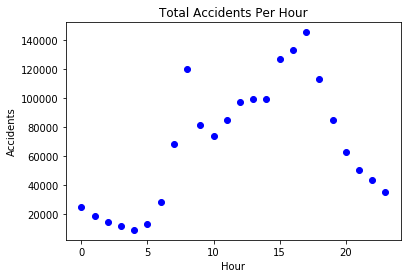

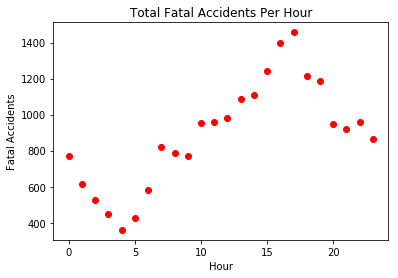

In [28]:
plt.scatter(hour_data['hour'].value_counts().index, hour_data['hour'].value_counts(), color='b')
plt.title('Total Accidents Per Hour')
plt.xlabel('Hour')
plt.ylabel('Accidents')
plt.show()

plt.scatter(fatal_hour_data['hour'].value_counts().index, fatal_hour_data['hour'].value_counts(), color='r')
plt.title('Total Fatal Accidents Per Hour')
plt.xlabel('Hour')
plt.ylabel('Fatal Accidents')
plt.show()

In [29]:
print("Hour with highest occurence of fatal accidents is:", fatal_hour_data['hour'].value_counts().index[0])
print("Hour with highest occurence of total accidents is:", hour_data['hour'].value_counts().index[0])

Hour with highest occurence of fatal accidents is: 17
Hour with highest occurence of total accidents is: 17


In [30]:
print("Frequency of fatal accidents to all accidents in that hour: ",fatal_hour_data['hour'].value_counts()[0]/hour_data['hour'].value_counts()[0])

Frequency of fatal accidents to all accidents in that hour:  0.0100207016554


---
<br>
**Q.iii) There appears to be a linear trend in the number of accidents that occur each year. What is that trend?**

In [3]:
accident_data = pd.read_csv(accident_file, usecols=['Date'])

In [4]:
accident_year = pd.DataFrame(accident_data['Date'].str.split('/').tolist(), columns='month day year'.split())['year']

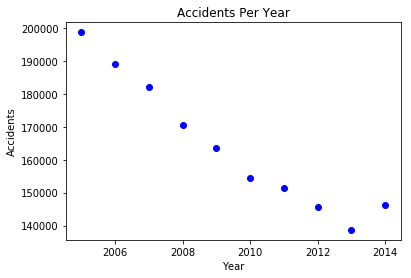

In [5]:
accidents_per_year = []
for i in np.unique(accident_year):
    accidents_per_year.append(len(accident_year[accident_year == i]))

plt.scatter(np.unique(accident_year), accidents_per_year, color='b')
plt.title('Accidents Per Year')
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.show()

In [6]:
slope, intercept = np.polyfit([i for i in range(2005,2015)], accidents_per_year, 1)
print("The slope of accidents per year is: ",slope)

The slope of accidents per year is:  -6511.72727273


---
<br>**Q.iv) Do accidents in high-speed-limit areas have more casualties? Compute the Pearson correlation coefficient between the speed limit and the ratio of the number of casualties to accidents for each speed limit. Bin the data by speed limit.**

---
<br>**Q.v) How many times more likely are you to be in an accident where you skid, jackknife, or overturn (as opposed to an accident where you don't) when it's raining or snowing compared to nice weather with no high winds? Ignore accidents where the weather is unknown or missing.**

In [19]:
skiddingOverturning_data = pd.read_csv(vehicles_file, usecols=['Accident_Index','Skidding_and_Overturning'])

In [50]:
accident_unknown     = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == -1]
accident_other_cause = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 0]

skid          = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 1]
skid_overturn = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 2]
overturn      = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 5]
jack_overturn = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 4]
jack          = skiddingOverturning_data[skiddingOverturning_data['Skidding_and_Overturning'] == 3]

print("1. Intersection between skid and (skid+overturn)?: ",bool(set(skid['Accident_Index']) & set(skid_overturn['Accident_Index'])))
print("2. Intersection between Jackknife and (overturn+jackknife)?: ",bool(set(jack['Accident_Index']) & set(jack_overturn['Accident_Index'])))
print("3. Intersection between (Other cause(s)) and (missing data)?: ",bool(set(accident_unknown['Accident_Index']) & set(accident_other_cause['Accident_Index'])))
print("\nhmm...I don't why 3. is True!\n")

1. Intersection between skid and (skid+overturn)?:  True
2. Intersection between Jackknife and (overturn+jackknife)?:  True
3. Intersection between (Other cause(s)) and (missing data)?:  True

hmm...I don't why 3. is True!



- As there is intersection between various sets, we have to remove duplicates while taking union!

In [39]:
skid_overturn_jack = (pd.concat([skid,overturn,jack])).drop_duplicates(['Accident_Index'])

In [51]:
prob_known_to_other = len(skid_overturn_jack)/len(accident_other_cause)
print("Probability of accident where you (skid or jackknife or overturn)/(Other cause(s)): ",prob_known_to_other)

Probability of accident where you (skid or jackknife or overturn)/(Other cause(s)):  0.11830181101352405


In [23]:
weather_data = pd.read_csv(accident_file, usecols=['Accident_Index','Weather_Conditions'])

- We have to compare (Rain + Snow with/without wind) and (Nice weather + No high wind)

In [57]:
rain_snow_wind = weather_data[(weather_data['Weather_Conditions'].isin([2,3,5,6])) & (weather_data['Accident_Index'].isin(skid_overturn_jack['Accident_Index']))]
nice_no_wind   = weather_data[(weather_data['Weather_Conditions'].isin([1,8])) & (weather_data['Accident_Index'].isin(accident_other_cause['Accident_Index']))]

- rain_snow_wind: Accidents when there is (rain+snow+with/without wind) & (skid + jackknifed + overtuned)
- nice_no_wind  : Accidents when there is ((nice weather + No high wind) + Other) & (some other cause of accident)

In [58]:
print("Probability of (rain_snow_wind)/(nice_no_wind): ",len(rain_snow_wind)/len(nice_no_wind))

Probability of (rain_snow_wind)/(nice_no_wind):  0.05575176445368569


---
<br>**Q.vi) How many times more likely are accidents involving male car drivers to be fatal compared to accidents involving female car drivers? The answer should be the ratio of fatality rates of males to females. Ignore all accidents where the driver wasn't driving a car.**

In [5]:
accidentSeverity = pd.read_csv(accident_file, usecols=['Accident_Index','Accident_Severity'])
driverGender     = pd.read_csv(vehicles_file, usecols=['Accident_Index','Vehicle_Type','Sex_of_Driver'])

In [6]:
fatalAccidents = accidentSeverity[(accidentSeverity['Accident_Severity'] == 1)]

fatalMales   = driverGender[(driverGender['Sex_of_Driver'] == 1) & (driverGender['Vehicle_Type'] != 9) & (driverGender['Accident_Index'].isin(fatalAccidents['Accident_Index']))]
fatalFemales = driverGender[(driverGender['Sex_of_Driver'] == 2) & (driverGender['Vehicle_Type'] != 9) & (driverGender['Accident_Index'].isin(fatalAccidents['Accident_Index']))]

In [7]:
print("Ratio of fatality rates of males to females (when driver wasn't driving car): ", fatalMales.shape[0]/fatalFemales.shape[0])

Ratio of fatality rates of males to females (when driver wasn't driving car):  21.334405144694532


---
<br>**Q.vii) We can use the accident locations to estimate the areas of the police districts. Represent each as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude. What is the area, in square kilometers, of the largest district measured in this manner?**

---
<br>**Q.viii) How fast do the number of car accidents drop off with age? Only consider car drivers who are legally allowed to drive in the UK (17 years or older). Find the rate at which the number of accidents exponentially decays with age. Age is measured in years. Assume that the number of accidents is exponentially distributed with age for driver's over the age of 17.**

In [58]:
driver_data = pd.read_csv(vehicles_file, usecols=['Accident_Index','Vehicle_Type','Age_of_Driver', 'Age_Band_of_Driver'])

In [59]:
carDrivers_above17 = driver_data[(driver_data['Vehicle_Type'] == 9) & (driver_data['Age_of_Driver'] >= 17)]

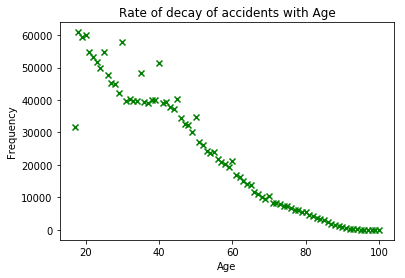

In [61]:
plt.scatter(carDrivers_above17['Age_of_Driver'].value_counts().index, carDrivers_above17['Age_of_Driver'].value_counts(), color='g',marker ='x')
plt.title('Rate of decay of accidents with Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
from scipy.optimize import curve_fit

---

---
# Q3.
**Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.**

**Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.**

**We want to know your communication style. Record a video of yourself giving a high-level proposal of your project to a non-technical person. The video should be no longer than 1 minute and should be at a higher level than the previous explanation.**

**Record a video of yourself and upload it to YouTube (and not another video hosting service). Be sure to make the video unlisted (but not private!) so people without the link cannot find it on Google (go here, click "Edit" on your video, select unlisted from the privacy dropdown menu, and save your changes). You can use either your webcam or a smartphone.**

**Once complete, please provide the embed URL of the video. To find this URL (NOT the entire iframe tag), on the video's normal watch page, you can click Share → Embed, and take the link from inside the 'src' attribute of the tag. Please provide the EMBED URL to your video***